# Flux, magnitudes, colors, and color-magnitude diagrams IRL (sort of)

I have put together some filter curves (from the SDSS) and a basic function to plot blackbody intensity ($I_{\lambda}$) versus wavelength for blackbody emitters (stars).

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.io import ascii
import seaborn as sns
from astropy.io import fits
%matplotlib inline

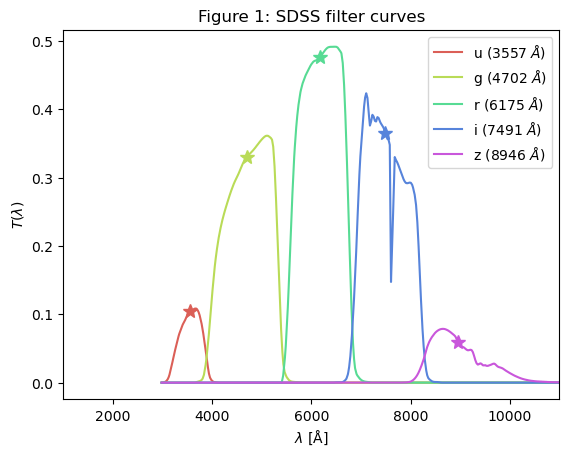

In [13]:
# SDSS standard filter transmission curves
# http://filters.apo.nmsu.edu/curves/SDSS/
sdss_filter_names = ['u','g','r','i','z']

# effective wavelengths for each filter
sdss_pivot_wavelengths = [3557, 4702, 6175, 7491, 8946]

colors = sns.color_palette("hls", 5)

lines = []
for filter_name,color,piv in zip(sdss_filter_names,colors,sdss_pivot_wavelengths):
    t = np.genfromtxt('sdss_filters/'+filter_name+'.txt',names=True,dtype=None)
    plt.plot(t['l'], t['T'],label=(filter_name+' ({0} $\AA$)'.format(piv)),color=color)
    plt.plot([piv],[t['T'][np.argmin(np.abs(t['l']-piv))]],'*',color=color,ms=10)
plt.xlim([1000,11000])
plt.legend()
plt.xlabel(r'$\lambda~[\rm \AA]$')
plt.ylabel(r'$T(\lambda)$')
plt.title('Figure 1: SDSS filter curves')
plt.show()

$$
I_\lambda(\lambda, T) \;=\; 
\frac{2hc^2}{\lambda^5} \;
\frac{1}{\exp\!\left(\dfrac{hc}{\lambda k T}\right) - 1}
$$

- \(I_\lambda(\lambda, T)\): specific intensity of blackbody radiation  
- Units: \(\mathrm{erg \; cm^{-2} \; s^{-1} \; \AA^{-1} \; sr^{-1}}\)  
- \(\lambda\): wavelength (here expressed in cm, converted at the end to Å)  
- \(T\): temperature in kelvin  
- \(h\): Planck’s constant  
- \(c\): speed of light  
- \(k\): Boltzmann’s constant  

Flux = pi * Intesnity for an isotropic system.

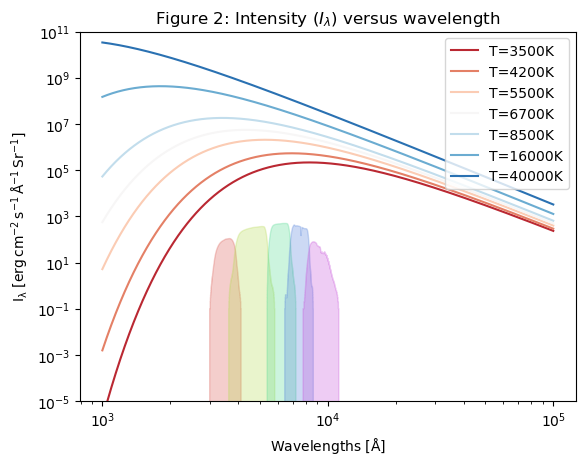

In [17]:
# blackbody intensity function
h = 6.6261*10**(-27)  # cm^2 g / s
c = 2.99792*10**(10)  # cm / s
k = 1.3806*10**(-16)  # erg / K

def planck(wav, T):
    """
    blackbody intensity function
    
    Parameters
    ----------
    wav : array_like
        array of wavelengths in units of cm
    
    T : float
        blackbody temperature in units of kelvin
    """
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    # in units erg cm^{-2} s^{-1} cm^{-1} Sr^{-1}    
    intensity = a/((wav**5)*(np.exp(b)-1.0))
    
    intensity = intensity*1e-8
    # in units erg cm^{-2} s^{-1} \AA^{-1} Sr^{-1}
    return intensity

temps = [3500, 4200, 5500, 6700, 8500, 16000, 40000]  # Kelvin
colors = sns.color_palette("RdBu_r",len(temps))[::-1]
wav = np.arange(1000, 100000, 1)  # Angstroms

fig = plt.figure()
for T,color in zip(temps,colors):
    wav_in_cm = wav*1e-8
    bb = planck(wav_in_cm, T)
    plt.plot(wav, bb,color=color,label='T={0}K'.format(T))
plt.title('Figure 2: Intensity ($I_{\lambda}$) versus wavelength')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelengths [$\mathrm{\AA}$]')
plt.ylabel('$\mathrm{ I_{\lambda}}$ [$\mathrm{erg\,cm^{-2}\,s^{-1}\,\AA^{-1}\,Sr^{-1}}$]')

sdss_filter_names = ['u','g','r','i','z']

filtcolors = sns.color_palette("hls", len(sdss_filter_names))

for filter_name,color in zip(sdss_filter_names,filtcolors):
    t = np.genfromtxt('sdss_filters/'+filter_name+'.txt',names=True,dtype=None)
    plt.fill_between(t['l'], np.zeros_like(t['l']), t['T']*1e3,\
                     label=filter_name,color=color,alpha=0.3)

plt.ylim(1e-5,1e11)
plt.show()

A note about flux versus intensity: Although blackbody radiation is isotropic, flux coming from the surface of the star will leave in a net parallel direction to a small portion of the surface (see Figure 2.2 in the textbook), so the flux that escapes the surface of the star is $F = \pi I$.

(1000.0, 100000000000.0)

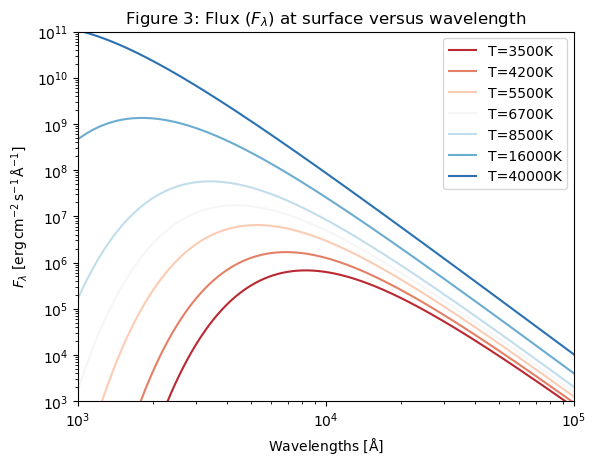

In [18]:
temps = [3500,4200,5500,6700,8500,16000,40000]
colors = sns.color_palette("RdBu_r",len(temps))[::-1]

### notice the extra factor of pi!! (figure 2.2, equation 2.5)
fig = plt.figure()
for T,color in zip(temps,colors):
    wav_in_cm = wav*1e-8
    bb = planck(wav_in_cm, T)*np.pi
    plt.plot(wav, bb,color=color,label='T={0}K'.format(T))
plt.title('Figure 3: Flux ($F_{\lambda}$) at surface versus wavelength')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelengths [$\mathrm{\AA}$]')
plt.ylabel('${F_{\lambda}}$ [$\mathrm{erg\,cm^{-2}\,s^{-1}\,\AA^{-1}}$]')
plt.xlim(1000,1e5)
plt.ylim(1e3,1e11)

1) Now recreate the intensity plot (or $F_{\mathrm{\lambda,surface}}$) as a $F_{\lambda}$ versus wavelength that one would observe on Earth assuming $R_{*}=R_{\odot}$ and $d_{Earth-Star}=10$ parsecs.


You can find this relationship in *Astrophysics in a Nutshell* in the section on stellar luminosity and flux.  
For a star of radius $r_\star$ at distance $d$, the observed flux is related to the surface flux by the inverse-square law:

$$
L = 4 \pi r_\star^{2} \, \sigma T^{4},
\quad\quad
L = f \, 4 \pi d^{2},
$$

so that

$$
f = \left(\frac{r_\star}{d}\right)^{2} \, \sigma T^{4}.
$$

This is the **bolometric version**, but the same scaling applies to each wavelength element. That’s why we write:

$$
F_{\lambda, \text{Earth}}(\lambda)
= \left(\frac{R_\star}{d}\right)^2 F_{\lambda, \text{surface}}(\lambda)
= \left(\frac{R_\star}{d}\right)^2 \pi I_\lambda(\lambda, T).
$$

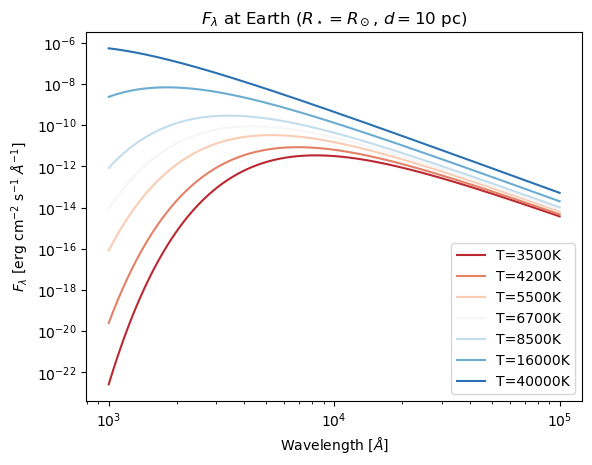

In [19]:
scale = 5.083266875016086e-18  # (R_sun / 10 pc)^2 in cgs
# Note the zip command pairs up elements from each list. 
for T, color in zip(temps, colors):
    bb_I = planck(wav*1e-8, T) # 1e-8 is the cm conversion, I_lambda [erg cm^-2 s^-1 Å^-1 sr^-1]
    F_lambda_earth = math.pi * bb_I * scale    # F_lambda at Earth [erg cm^-2 s^-1 Å^-1]
    plt.plot(wav, F_lambda_earth, color=color, label=f"T={T}K")
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r"Wavelength [$\AA$]"); plt.ylabel(r"$F_\lambda$ [erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]")
plt.title(r"$F_\lambda$ at Earth ($R_\star=R_\odot$, $d=10$ pc)"); plt.legend(); plt.show()

2) Now, calculate the total flux that would be observed from this star assuming $T_{eff}=5500k$ through each filter in $erg\,cm^{-2}\,s^{-1}\,Angstrom^{-1}$. Add these fluxes to your $f_{\lambda}(\lambda)$ plot by including the broadband fluxes at the pivot wavelengths.

Reminder: $f_{\lambda,X} = \int_0^\infty f_{\lambda}(\lambda) F_X(\lambda) R(\lambda) T(\lambda) d\lambda$

For this you may assume that $R(\lambda)$ and $T(\lambda)$ are ideal ($\approx 1$)

However, ultimately people usually characterize the flux density in a given filter as the /average/ flux density (to convert to a magnitude).

$\langle f_{\lambda,X}\rangle = \frac{\int_0^\infty f_{\lambda}(\lambda) F_X(\lambda) R(\lambda) T(\lambda) \lambda d\lambda}{\int_0^\infty F_X(\lambda) R(\lambda) T(\lambda) \lambda d\lambda}$

which in this case turns into:

$\langle f_{\lambda,X}\rangle = \frac{\int_0^\infty f_{\lambda}(\lambda) F_X(\lambda) \lambda d\lambda}{\int_0^\infty F_X(\lambda) \lambda d\lambda}$


Hint: You will have to solve this integral numerically, approximating the integral as a sum: $\int_0^\infty f_{\lambda}(\lambda) F_X(\lambda) \lambda d\lambda \approx \Sigma_{\lambda_i=\lambda_{min}}^{\lambda_{max}} f_{\lambda}(\lambda_i) F_X(\lambda_i) \lambda d\lambda$

Hint 2: make sure that your $\lambda_i$ grid is the same for the blackbody curve and the transmission curves!

[ 1000  1001  1002 ... 10998 10999 11000]
[1. 1. 1. ... 1. 1. 1.]
u 2.1468377881806436e-11
g 3.144333912041917e-11
r 3.08385854199995e-11
i 2.5181278422793568e-11
z 1.8758936486830278e-11


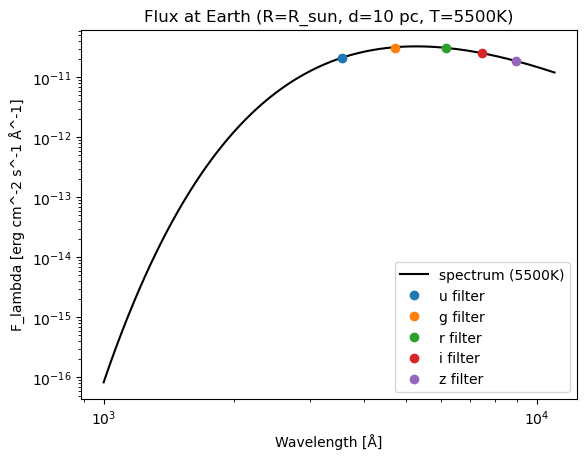

In [ ]:
# --- constants / setup ---
T_eff = 5500  # Given to us as part of the problem.
scale = 5.083266875016086e-18  # (R_sun / 10 pc)^2 in cgs - From Problem 1 
sdss_filter_names = ['u','g','r','i','z']
pivot = [3557, 4702, 6175, 7491, 8946]  # (in angstroms copied from an earlier list). 

# Use a wavelength grid that covers the SDSS filters well
wav = np.arange(1000, 11001, 1)  # These sdss filters cover this range as given in the problem.
dlam = np.gradient(wav)          # Å step per pixel (just an array of 1s since we count from 1k to 11k in increments of 1
                                 # in the wav definition. 

print(wav)
print(dlam)

# --- compute F_lambda at Earth for a blackbody star (R_sun, d=10 pc) ---
# Just going over what we did before, using planck funciton to find inensity.
# Then using isotropic assumptinon to get flux from intensity.
I_lam = planck(wav*1e-8, T_eff)  # I_lambda [erg cm^-2 s^-1 Å^-1 sr^-1]
F_lam_earth = math.pi * I_lam * scale  # [erg cm^-2 s^-1 Å^-1]


# <fx,y>
avg_flux = {}

# Loops over SDSS filter names and their associated pivot locations.

for f, p in zip(sdss_filter_names, pivot):
    # load the filter transmission
    t = np.genfromtxt("sdss_filters/"+f+".txt", names=True, dtype=None)
    lam_filt = t['l'] # Wavelength data.
    T_filt = t['T'] # Transmission data for the filter.
    
    # quick + dirty: just resample the filter onto our wav grid by hand
    FX = np.interp(wav, lam_filt, T_filt, left=0, right=0)

    # brute force "integral" as a sum
    num = 0.0
    den = 0.0
    for i in range(len(wav)):
        num += F_lam_earth[i] * FX[i] * wav[i]
        den += FX[i] * wav[i]
    avg_flux[f] = num / den

    print(f, avg_flux[f])


    # plot the spectrum
plt.figure()
plt.plot(wav, F_lam_earth, 'k', label="spectrum (5500K)")

# now add the broadband fluxes at pivot wavelengths
for f, p in zip(sdss_filter_names, pivot):
    plt.plot(p, avg_flux[f], 'o', label=f"{f} filter")

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Wavelength [Å]")
plt.ylabel("F_lambda [erg cm^-2 s^-1 Å^-1]")
plt.title("Flux at Earth (R=R_sun, d=10 pc, T=5500K)")
plt.legend()
plt.show()

3) Now you will calculate the magnitudes in the AB system:

$m_{AB} \equiv -2.5 \log_{10} f_{\nu} - 48.60$ (if $f_{\nu} [erg\,s^{-1}\,cm^{-2}\,Hz^{-1}]$)

(a) You'll notice that your current fluxes are in $f_{\lambda}$, so the first step is to convert to $f_{\nu}$. Please assume that the fluxes are measured at the pivot wavelengths.

(b) And _then_ you will calculate the AB magnitudes.

In [25]:
# constants
c = 2.99792458e10  # cm/s

ab_mag = {}
fnu_dict = {}

for f, lam_A in zip(sdss_filter_names, pivot):
    fl_A = avg_flux[f]                  # <f_lambda> in erg cm^-2 s^-1 Å^-1
    fl_cm = fl_A * 1e8                  # -> erg cm^-2 s^-1 cm^-1
    lam_cm = lam_A * 1e-8               # Å -> cm
    fnu = fl_cm * (lam_cm**2) / c       # erg cm^-2 s^-1 Hz^-1
    fnu_dict[f] = fnu
    ab_mag[f] = -2.5*np.log10(fnu) - 48.60

# quick printout
for f in sdss_filter_names:
    print(f"{f}: f_nu = {fnu_dict[f]:.3e}  ->  m_AB = {ab_mag[f]:.3f}")

u: f_nu = 9.060e-23  ->  m_AB = 6.507
g: f_nu = 2.319e-22  ->  m_AB = 5.487
r: f_nu = 3.922e-22  ->  m_AB = 4.916
i: f_nu = 4.713e-22  ->  m_AB = 4.717
z: f_nu = 5.008e-22  ->  m_AB = 4.651


4) Repeat for all temperatures and plot $T_{eff}$ versus $(g-r)$ color. What can you conclude about the sensitivity of optical filters to effective temperatures of all stars? Hint: what would happen if stars got even hotter ($T_{eff}>40,000K$)?

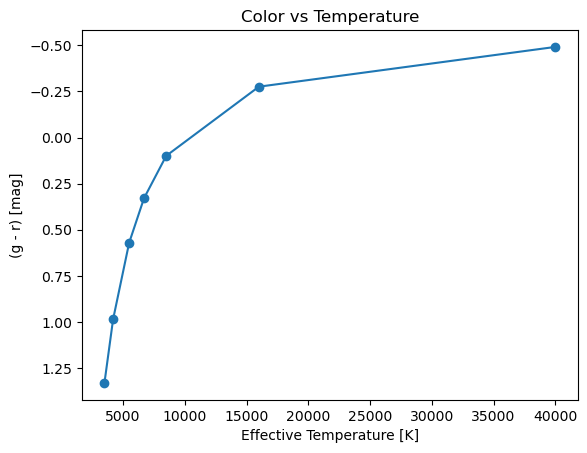

In [26]:
colors_gr = []

for T_eff in temps:
    # compute F_lambda at Earth
    I_lam = planck(wav*1e-8, T_eff)      # I_lambda
    F_lam = math.pi * I_lam * scale      # flux at Earth
    
    # average flux per filter
    avg_flux_T = {}
    for f, p in zip(sdss_filter_names, pivot):
        t = np.genfromtxt("sdss_filters/"+f+".txt", names=True, dtype=None)
        FX = np.interp(wav, t['l'], t['T'], left=0, right=0)
        num, den = 0.0, 0.0
        for i in range(len(wav)):
            num += F_lam[i] * FX[i] * wav[i]
            den += FX[i] * wav[i]
        avg_flux_T[f] = num/den
    
    # convert g and r to AB mags
    mags = {}
    for f, lam_A in zip(sdss_filter_names, pivot):
        fl_cm = avg_flux_T[f] * 1e8
        lam_cm = lam_A * 1e-8
        fnu = fl_cm * lam_cm**2 / c
        mags[f] = -2.5*np.log10(fnu) - 48.60
    
    # store g-r color
    colors_gr.append(mags['g'] - mags['r'])

# plot T vs (g-r)
plt.figure()
plt.plot(temps, colors_gr, 'o-')
plt.xlabel("Effective Temperature [K]")
plt.ylabel("(g - r) [mag]")
plt.title("Color vs Temperature")
plt.gca().invert_yaxis()  # magnitudes: brighter = smaller
plt.show()

Bonus: If you have extra time, you can check your calculations for Proxima centauri, the closest star (1.3 parsecs away). Proxima centauri has a $m_{G,AB}\sim8.9$ and an effective temperature of $T_{\mathrm{eff}}\sim3000K$ (yes, this *is* a slightly different filter, so you won't get exactly the correct answer, but you should get close).

This is an excellent example of a situation in which having a set of functions defined could be very useful when performing repetitive operations.